<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

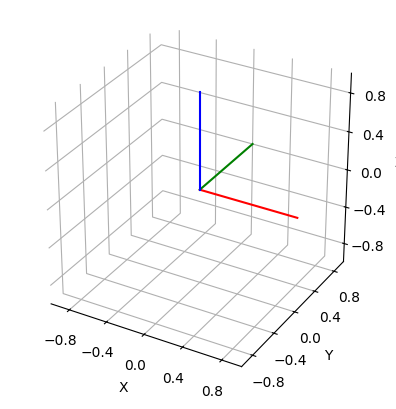

In [1]:
from pytransform3d.rotations import plot_basis
plot_basis()

In [35]:
from pytransform3d import rotations as pr
import numpy as np

# 姿态1
# z轴旋转90度
omega1 = np.array([0, 0, 1])
theta1 = np.pi/2
q1 = np.hstack([np.cos(theta1/2), omega1 * np.sin(theta1/2)])
q1_requires_renormalization = pr.quaternion_requires_renormalization(q1)
R1 = pr.matrix_from_quaternion(q1)
Omega1 = pr.compact_axis_angle_from_quaternion(q1)
a1 = pr.axis_angle_from_quaternion(q1)
print(f"姿态1")
print(f"四元数表示 q1:{q1}")
print(f"是否需要归一化:{q1_requires_renormalization}")
print(f"旋转矩阵表示 R1:{np.round(R1,2)}")
print(f"紧凑轴角表示 Omega1:{Omega1}")
print(f"轴角表示 a1:{a1}")

# 姿态2
# x轴旋转90度
omega2 = np.array([1, 0, 0])
theta2 = np.pi/2
q2 = np.hstack([np.cos(theta2/2), omega2 * np.sin(theta2/2)])
q2_requires_renormalization = pr.quaternion_requires_renormalization(q2)
R2 = pr.matrix_from_quaternion(q2)
Omega2 = pr.compact_axis_angle_from_quaternion(q2)
a2 = pr.axis_angle_from_quaternion(q2)
print(f"姿态2")
print(f"四元数表示 q2:{q2}")
print(f"是否需要归一化:{q2_requires_renormalization}")
print(f"旋转矩阵表示 R2:{np.round(R2,2)}")
print(f"紧凑轴角表示 Omega2:{Omega2}")
print(f"轴角表示 a2:{a2}")
# q1 = np.hstack([np.cos(theta1/2), omega1 * np.sin(theta1/2)])
# print(q1)
# print(pr.quaternion_requires_renormalization(q1))
# print(pr.matrix_from_quaternion(q1))
# print(pr.compact_axis_angle_from_quaternion(q1) )
# print(pr.axis_angle_from_quaternion(q1))

a = pr.quaternion_diff(q2, q1)
q = pr.concatenate_quaternions(q2, pr.q_conj(q1))
Omega2minusOmega1 = Omega2 - Omega1
print(f"轴角表示 a:{a}")
print(f"四元数表示 q:{q}")

# 比较不同方法下计算的旋转矩阵
R = R2 @ R1.T  # 直接计算
R_q = pr.matrix_from_quaternion(q)  # 四元数乘法计算
R_a = pr.matrix_from_axis_angle(a)  # 轴角计算
R_Omega2minusOmega1 = pr.matrix_from_compact_axis_angle(Omega2minusOmega1)  # 紧凑轴角直接相减计算
print(f"旋转矩阵表示，矩阵乘法计算 R:{np.round(R,2)}")
print(f"旋转矩阵表示，四元数乘法计算 R_q:{np.round(R_q,2)}")
print(f"旋转矩阵表示，轴角差计算 R_a:{np.round(R_a,2)}")
print(f"旋转矩阵表示，紧凑轴角差计算 R_Omega2minusOmega1:{np.round(Omega2minusOmega1,2)}")


# 比较不同方法下的紧凑轴角差值
Omega_q = pr.compact_axis_angle_from_quaternion(q)
Omega_R = pr.compact_axis_angle_from_matrix(R)
Omega_a = pr.compact_axis_angle(a)
print(f"比较不同方法下的紧凑轴角差值")
print(f"线性插值，Omega2 - Omega1:{Omega2minusOmega1}")  # 线性差值
print(f"四元数计算插值:{Omega_q}")
print(f"旋转矩阵计算插值:{Omega_R}")
print(f"轴角计算插值:{Omega_a}")


# pr.compact_axis_angle(R)

# q10 = pr.concatenate_quaternions(q1, q)
# print(pr.matrix_from_quaternion(q10))
# print(pr.matrix_from_quaternion(q1)*pr.matrix_from_quaternion(q))

姿态1
四元数表示 q1:[0.70710678 0.         0.         0.70710678]
是否需要归一化:False
旋转矩阵表示 R1:[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
紧凑轴角表示 Omega1:[0.         0.         1.57079633]
轴角表示 a1:[0.         0.         1.         1.57079633]
姿态2
四元数表示 q2:[0.70710678 0.70710678 0.         0.        ]
是否需要归一化:False
旋转矩阵表示 R2:[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
紧凑轴角表示 Omega2:[1.57079633 0.         0.        ]
轴角表示 a2:[1.         0.         0.         1.57079633]
轴角表示 a:[ 0.57735027  0.57735027 -0.57735027  2.0943951 ]
四元数表示 q:[ 0.5  0.5  0.5 -0.5]
旋转矩阵表示，矩阵乘法计算 R:[[ 0.  1.  0.]
 [-0.  0. -1.]
 [-1.  0.  0.]]
旋转矩阵表示，四元数乘法计算 R_q:[[ 0.  1.  0.]
 [-0.  0. -1.]
 [-1.  0.  0.]]
旋转矩阵表示，轴角差计算 R_a:[[ 0.  1. -0.]
 [-0. -0. -1.]
 [-1.  0.  0.]]
旋转矩阵表示，紧凑轴角差计算 R_Omega2minusOmega1:[ 1.57  0.   -1.57]
比较不同方法下的紧凑轴角差值
线性插值，Omega2 - Omega1:[ 1.57079633  0.         -1.57079633]
四元数计算插值:[ 1.20919958  1.20919958 -1.20919958]
旋转矩阵计算插值:[ 1.20919958  1.20919958 -1.20919958]
轴角计算插值:[ 1.20919958  1.20919958 -1.20